<a href="https://colab.research.google.com/github/ipark3/Hank-Ian/blob/main/GitHub%20Project/dataset/code/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Features
Dataset Name: Air_Quality <br>
Indicator ID <br>
Type <br>
Name <br>
Measure Info <br>
Geo Type Name <br>
Geo Join ID <br>
Geo Place Name <br>
Time Period <br>
Start Date <br>
Data Value <br>


Key attributes are the types such as <u>PM 2.5,</u> <u>Nitrogen Dioxide,</u><u> Total SO2,</u> and <u> Ozone (O3)</u>
<br><br>

Size: 18,026 <br>
Created: 	November 10, 2020 <br>
Dataset: 	https://catalog.data.gov/dataset/air-quality <br>


# Data Cleanup:

In [12]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Personal/Air_Quality.csv'
df = pd.read_csv(file_path)

# remove Message
if 'Message' in df.columns:
    df = df.drop(columns=['Message'])

# Handle missing values in 'Geo Join ID' and 'Geo Place Name'
df = df.dropna(subset=['Geo Join ID', 'Geo Place Name'])

# turn into ints
df['Geo Join ID'] = df['Geo Join ID'].astype(int)

# Remove duplicate rows, if any
df = df.drop_duplicates()

# Cleaned data
print("");
print("Cleaned Dataset Overview:")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

print("")
print("Columns and their data types:")
print(df.dtypes)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Cleaned Dataset Overview:
Total rows: 18016
Total columns: 11

Columns and their data types:
Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID         int64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
dtype: object


These steps help to removed the empty collumn of Message in the dataset.

Leaving us with 18,016 left rows, 11 columns, and their data types.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


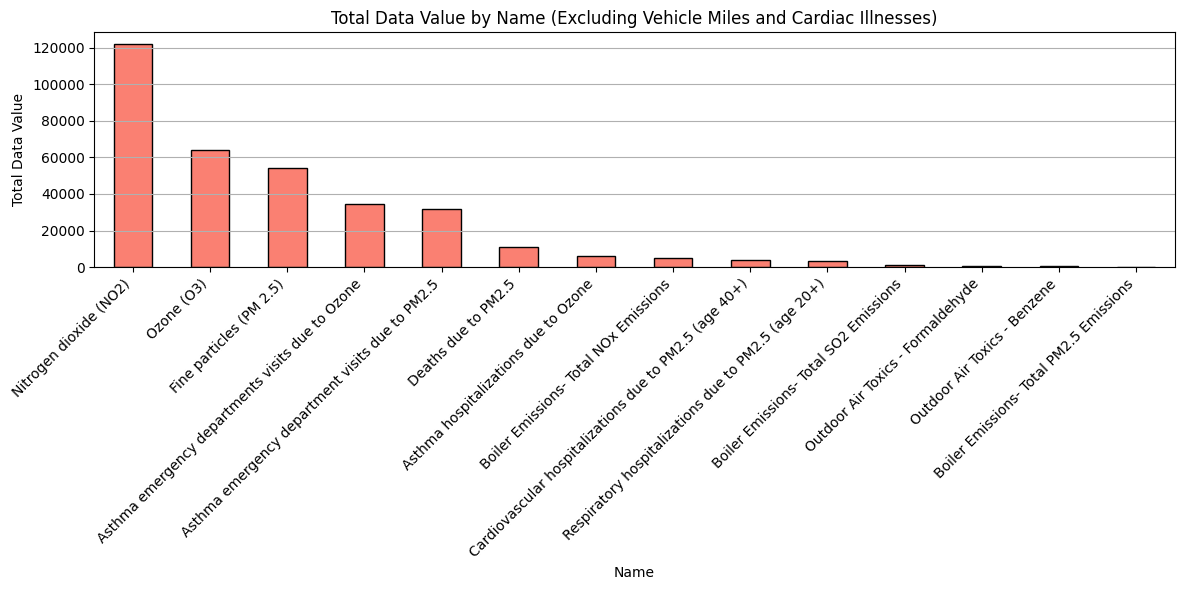

In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset (update the file path as needed)
file_path = '/content/drive/MyDrive/Personal/Cleaned_Air_Quality.csv'
df = pd.read_csv(file_path)


# Step 1: Filter out rows related to vehicle miles and cardiac illnesses
filtered_df = df[~df['Name'].str.contains('vehicle miles|Cardiac', case=False, na=False)]

# Step 2: Group the filtered data by 'Name' and sum up the 'Data Value'
filtered_name_grouped = filtered_df.groupby('Name')['Data Value'].sum().sort_values(ascending=False)

# Step 3: Plot the filtered grouped bar graph
plt.figure(figsize=(12, 6))
filtered_name_grouped.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Total Data Value by Name (Excluding Vehicle Miles and Cardiac Illnesses)')
plt.xlabel('Name')
plt.ylabel('Total Data Value')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This bar gives a clear view of the number of times that each of the catergories are shown.

As you can see Nitrogen Dioxide is clearly shown as the most common element found during all of these test.

Nitrogen Dioxide - leads to smog, ground-level ozone and respiratory issues    <br>

Ozone - Fine paricicles of soot and ash during combustion. Leads to asthma, bronchitis, and cardiovascular issues <br>

Fine particles - The 2.5 is in relation to thier size which can make it eaiser for the particle to travel. Occurs from fires, vehicles and contstuction to name a few. <br>

Boiler Emissions - |This is mostly found by pollutents repleased when buining fuel such as coal, oil, or natural gas   <br>


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


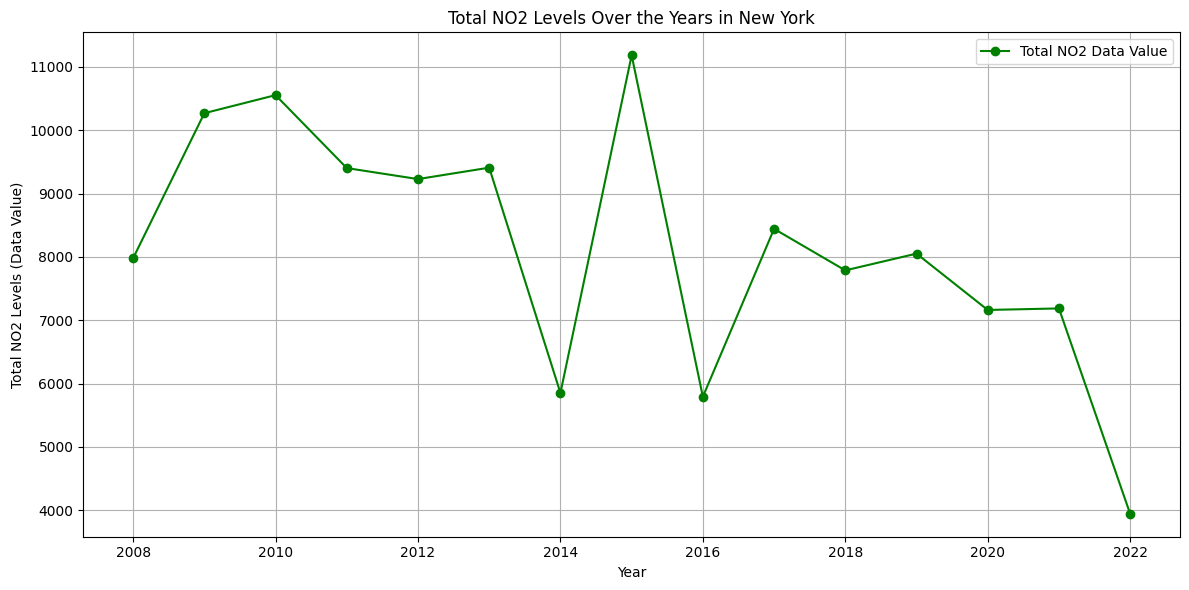

In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Personal/Cleaned_Air_Quality.csv'  # Update path as needed
df = pd.read_csv(file_path)

# Ensure 'Start_Date' is a datetime column and extract the year
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')
df['Year'] = df['Start_Date'].dt.year

# Filter the dataset for rows related to NO2 (Nitrogen Dioxide)
no2_df = df[df['Name'].str.contains('NO2', case=False, na=False)]

# Group data by year and calculate the total Data Value for NO2
no2_yearly_totals = no2_df.groupby('Year')['Data Value'].sum()

# Plot a timeline graph for NO2
plt.figure(figsize=(12, 6))
plt.plot(no2_yearly_totals.index, no2_yearly_totals.values, marker='o', linestyle='-', color='green', label='Total NO2 Data Value')
plt.title('Total NO2 Levels Over the Years in New York')
plt.xlabel('Year')
plt.ylabel('Total NO2 Levels (Data Value)')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()


#Regression:

Linear Regression: <br>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Linear Regression Results with Additional Features for the year 2020:
Mean Squared Error: 9.76
R-squared: 0.87


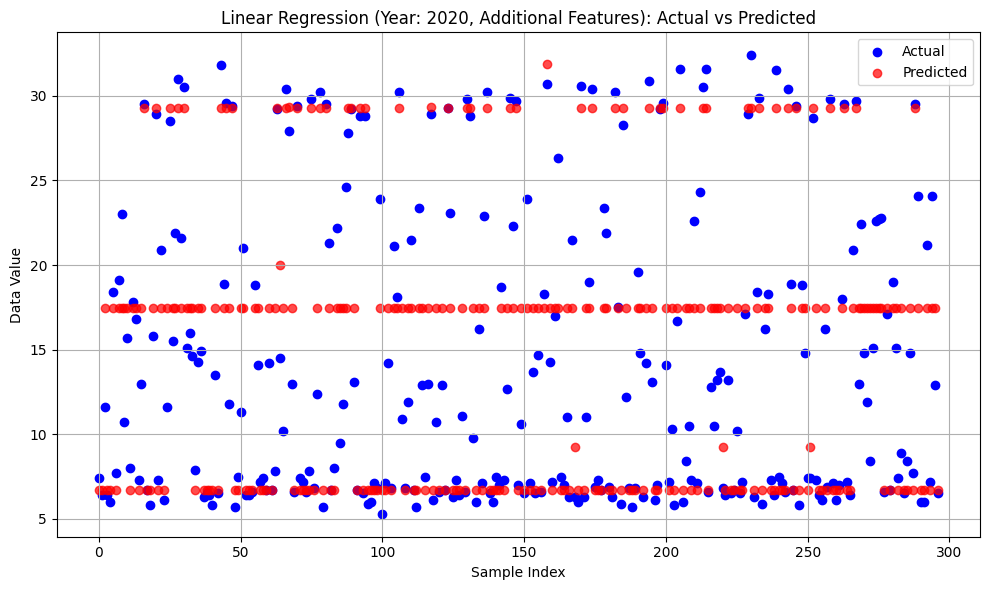

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Personal/Cleaned_Air_Quality.csv'  # Update path as needed
df = pd.read_csv(file_path)

# Filter data for a specific year (e.g., 2020)
selected_year = 2020
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')  # Ensure Start_Date is a datetime
df['Year'] = df['Start_Date'].dt.year  # Extract year from Start_Date
filtered_year_df = df[df['Year'] == selected_year]

# Drop rows with missing values in 'Geo Join ID' and 'Data Value'
regression_year_df = filtered_year_df.dropna(subset=['Geo Join ID', 'Data Value'])

# Prepare feature and target variables
additional_features = ['Geo Join ID', 'Indicator ID']  # Add more if needed
X_year_extended = regression_year_df[additional_features]
y_year = regression_year_df['Data Value']

# Split data for training and testing
X_train_year_ext, X_test_year_ext, y_train_year_ext, y_test_year_ext = train_test_split(
    X_year_extended, y_year, test_size=0.3, random_state=42
)

# Apply Linear Regression
linear_model_year_ext = LinearRegression()
linear_model_year_ext.fit(X_train_year_ext, y_train_year_ext)
y_pred_year_ext = linear_model_year_ext.predict(X_test_year_ext)

# Evaluation for Linear Regression
mse_year_ext = mean_squared_error(y_test_year_ext, y_pred_year_ext)
r2_year_ext = r2_score(y_test_year_ext, y_pred_year_ext)

# Display Linear Regression results
print(f"Linear Regression Results with Additional Features for the year {selected_year}:")
print(f"Mean Squared Error: {mse_year_ext:.2f}")
print(f"R-squared: {r2_year_ext:.2f}")

# Visualize Linear Regression for the selected year
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_year_ext)), y_test_year_ext, color='blue', label='Actual')
plt.scatter(range(len(y_pred_year_ext)), y_pred_year_ext, color='red', label='Predicted', alpha=0.7)
plt.title(f'Linear Regression (Year: {selected_year}, Additional Features): Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Data Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()




The blue points on the grpah are the actual that was observed. The red points are the predicted levels

The red lines lining near the blue dots show that their is a prediction is acurate.

The data Value is the recorded amount found in the dataset. The higher the Data Value then the higher of the element recorded during 2020.

#Supervised Learning:

#Unsupervised Learning:

#Decision Trees:

#Conclusion:

In total we have learned that the particles in the air can cause serious damage and we are working on decreasing the amount over the last few years.  